C:\Users\User\AppData\Local\Temp\ipykernel_14296\2253616667.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_success = df_age.groupby('age_group')['flag_3y_price'].agg(['count', 'sum'])


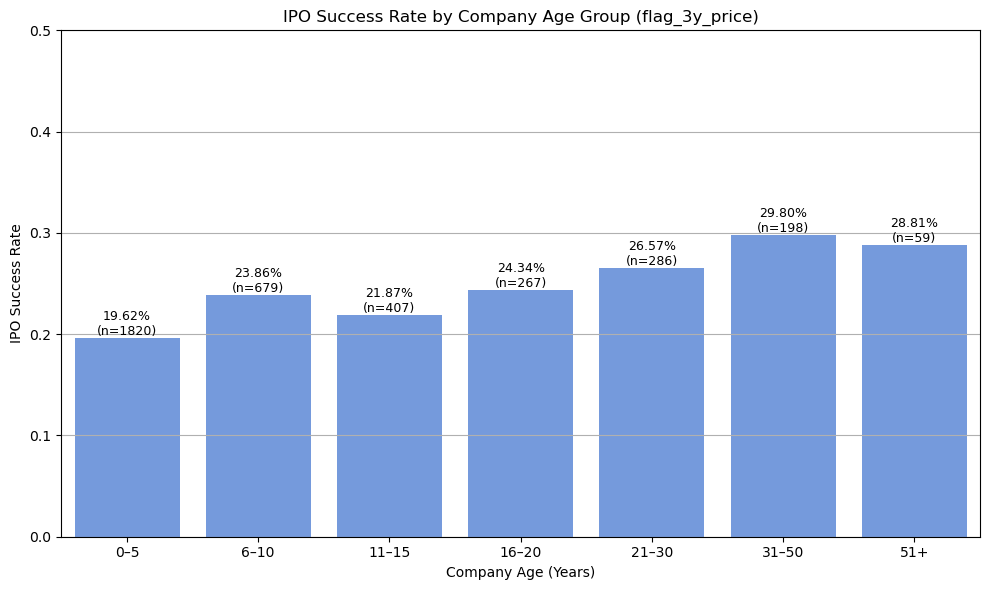

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('EODHD_Final_maxcik50_flat_wsf_incorp.csv')

if 'company_age_years' in df.columns and 'flag_3y_price' in df.columns:
    df_age = df[['company_age_years', 'flag_3y_price']].dropna()

    bins = [0, 5, 10, 15, 20, 30, 50, float('inf')]
    labels = ['0–5', '6–10', '11–15', '16–20', '21–30', '31–50', '51+']

    df_age['age_group'] = pd.cut(df_age['company_age_years'], bins=bins, labels=labels, right=True)

    age_success = df_age.groupby('age_group')['flag_3y_price'].agg(['count', 'sum'])
    age_success['success_rate'] = age_success['sum'] / age_success['count']

    plt.figure(figsize=(10,6))
    sns.barplot(x=age_success.index, y=age_success['success_rate'], color='cornflowerblue')
    plt.title('IPO Success Rate by Company Age Group (flag_3y_price)')
    plt.xlabel('Company Age (Years)')
    plt.ylabel('IPO Success Rate')
    plt.ylim(0, 0.5)
    plt.grid(True, axis='y')

    for i, p in enumerate(plt.gca().patches):
        height = p.get_height()
        count = age_success.iloc[i]['count']
        plt.text(p.get_x() + p.get_width()/2., height,
                 f'{height:.2%}\n(n={int(count)})',
                 ha='center', va='bottom', fontsize=9, color='black')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'company_age_years' or 'flag_3y_price' column not found.")


In [2]:
# Basic checks
total_rows = df.shape[0]
missing = df['company_age_years'].isna().sum()

print(f"🔢 Total records: {total_rows}")
print(f"❓ Missing 'company_age_years': {missing}")
print("\n📈 Descriptive stats for 'company_age_years':")
print(df['company_age_years'].describe())

# Distribution bins
bins = [0, 5, 10, 15, 20, 30, 50, 100, float('inf')]
labels = ['0–5', '6–10', '11–15', '16–20', '21–30', '31–50', '51–100', '100+']

df['age_group'] = pd.cut(df['company_age_years'], bins=bins, labels=labels, right=True)

# Count how many in each bin
print("\n📊 Distribution across age groups:")
print(df['age_group'].value_counts().sort_index())


🔢 Total records: 5057
❓ Missing 'company_age_years': 1338

📈 Descriptive stats for 'company_age_years':
count    3719.000000
mean       10.048468
std        15.480098
min         0.000000
25%         1.535934
50%         5.166324
75%        13.232033
max       266.880219
Name: company_age_years, dtype: float64

📊 Distribution across age groups:
age_group
0–5       1820
6–10       679
11–15      407
16–20      267
21–30      286
31–50      198
51–100      43
100+        16
Name: count, dtype: int64
